In [132]:
#!pip install openai

In [133]:
#!pip install --force-reinstall outlines transformers datasets bitsandbytes

In [6]:
import os
import json
from outlines import models, generate
from enum import Enum


os.environ["OPENAI_API_KEY"] = ''



class openaiGeneration:
   
    def __init__(self):
        self.openai = models.openai("gpt-4o", api_key = os.environ["OPENAI_API_KEY"])
        self.openaigenerator = generate.choice(self.openai, ["500", "0", "1000", "INFINITE", "100"])
        self.completed_json = {
            "12:00AM-12:59AM": -1,
            "1:00AM-1:59AM": -1,
            "2:00AM-2:59AM": -1,
            "3:00AM-3:59AM": -1,
            "4:00AM-4:59AM": -1,
            "5:00AM-5:59AM": -1,
            "6:00AM-6:59AM": -1,
            "7:00AM-7:59AM": -1,
            "8:00AM-8:59AM": -1,
            "9:00AM-9:59AM": -1,
            "10:00AM-10:59AM": -1,
            "11:00AM-11:59AM": -1,
            "12:00PM-12:59PM": -1,
            "1:00PM-1:59PM": -1,
            "2:00PM-2:59PM": -1,
            "3:00PM-3:59PM": -1,
            "4:00PM-4:59PM": -1,
            "5:00PM-5:59PM": -1,
            "6:00PM-6:59PM": -1,
            "7:00PM-7:59PM": -1,
            "8:00PM-8:59PM": -1,
            "9:00PM-9:59PM": -1,
            "10:00PM-10:59PM": -1,
            "11:00PM-11:59PM": -1
        }
        print("generator loaded")

    def gen_context(self, prompt, time):
        return f"""

        
        You are an intelligent assistant that determines the cost associated with scheduling activities for a specific hour of the day. Your task is to assess the given hour in context and assign a cost from the predefined options: ["0", "100", "500", "1000", "INFINITE"].

        Task Description:
        Generate a cost for the specified hour that aligns with natural language constraints and preferences for scheduling activities.

        For context:
        - Certain times are completely unavailable (e.g., sleep, existing meetings) which have "INFINITE" cost.
        - Some times are less ideal (e.g., early morning or late evening) which have a cost of "100", "500", or "1000".
        - Certain times are optimal for scheduling activities which have a cost of 0.

        Examples:

        Description:  From 12:00 AM to 6:59 AM, scheduling is unreasonable due to a preference against early appointments, so this time has a very high cost of 1000. From 7:00 AM to 8:59 AM, the time is available but less ideal, warranting a moderate cost of 50. From 9:00 AM to 2:00 PM, work constraints render these times unavailable with an INFINITE cost. Between 2:00 PM and 2:59 PM, this period is flexible and ideal for the doctor's appointment, so it has a cost of 0. From 3:00 PM to 3:59 PM, the dentist appointment makes this hour unavailable with an INFINITE cost. From 4:00 PM to 9:00 PM, scheduling is optimal, also with a cost of 0. Finally, from 9:01 PM to 11:59 PM, late hours are less preferable and have a high cost of 500.  
        Specified Hour: 1:00AM-1:59AM
        Output: "1000"  

        Description: From 12:00 AM to 6:59 AM, scheduling is unreasonable due to a preference against early appointments, so this time has a very high cost of 1000. From 7:00 AM to 8:59 AM, the time is available but less ideal, warranting a moderate cost of 50. From 9:00 AM to 2:00 PM, work constraints render these times unavailable with an INFINITE cost. Between 2:00 PM and 2:59 PM, this period is flexible and ideal for the doctor's appointment, so it has a cost of 0. From 3:00 PM to 3:59 PM, the dentist appointment makes this hour unavailable with an INFINITE cost. From 4:00 PM to 9:00 PM, scheduling is optimal, also with a cost of 0. Finally, from 9:01 PM to 11:59 PM, late hours are less preferable and have a high cost of 500.
        Specified Hour: 2:00PM-2:59PM  
        Output: "0"  

        Description: From 12:00 AM to 5:00 AM, scheduling soccer practice is unreasonable as it falls outside daylight hours, resulting in a high cost of 500. Between 5:01 AM and 7:00 AM, the early sunrise makes it less ideal, leading to a moderate cost of 100. From 7:01 AM to 4:00 PM, this time is available but not optimal, warranting a low-moderate cost of 50. The period from 4:00 PM to 5:59 PM is ideal for soccer practice, so the cost is 0. From 6:00 PM to 6:59 PM, the yoga class creates a scheduling conflict with an INFINITE cost. Finally, from 7:00 PM to 11:59 PM, scheduling falls outside preferred daylight hours, with a cost ranging linearly from 50 to 100.  
        Specified Hour: 10:00PM-10:59PM  
        Output: "100"  

        Description: From 12:00 AM to 5:00 AM, scheduling soccer practice is unreasonable as it falls outside daylight hours, resulting in a high cost of 500. Between 5:01 AM and 7:00 AM, the early sunrise makes it less ideal, leading to a moderate cost of 100. From 7:01 AM to 4:00 PM, this time is available but not optimal, warranting a low-moderate cost of 50. The period from 4:00 PM to 5:59 PM is ideal for soccer practice, so the cost is 0. From 6:00 PM to 6:59 PM, the yoga class creates a scheduling conflict with an INFINITE cost. Finally, from 7:00 PM to 11:59 PM, scheduling falls outside preferred daylight hours, with a cost ranging linearly from 50 to 100.  
        Specified Hour: 7:00AM-7:59PA  
        Output: "100"  

        
        Given the following description, determine the cost for the specified hour:

        Description: {prompt}  
        Specified Hour: {time}

        Hard Constraints:
        1. Only select a cost from ["0", "100", "500", "1000", "INFINITE"].
        2. Always evaluate and assign a cost based on the specific hour, without inferring across multiple hours.
        3. The output should only be the cost value in quotes.
        4. If the described cost is not one of the options, return the cost that is closest to the described cost. For example, if the described cost is 50, return "100" as 50 is not an option and 100 is the closest option to 50.
        5. Do not make up information that is not provided in the description and follow the constraints exactly.

        Output:
        

        """
    
    def call(self, prompt):
        sentence_so_far = ""
        keys = list(self.completed_json.keys())

        for hour in keys:
            # Add the current hour's description to the context
            sentence_so_far = self.gen_context(prompt, hour)
            openai_gen = None
            try:
                openai_gen = self.openaigenerator(sentence_so_far, max_tokens=2500, temperature=0.0)
                print(f"Generated (OpenAI): {openai_gen}")
                cost = openai_gen.strip()
            except ValueError:
                print(f"Invalid cost generated by OpenAI: {openai_gen}. Defaulting to 500")
                cost = 500
            except Exception as e:
                print(f"Error with OpenAI generation: {e}. Defaulting to 500.")
                cost = 500  # Fallback cost in case of error

            # Save the generated cost for the current hour
            self.completed_json[hour] = cost

        # Return the completed JSON as a string
        return self.completed_json
        


        

ModuleNotFoundError: No module named 'outlines'

In [135]:
def main(prompt):
    # model = "facebook/opt-iml-max-1.3b"
    
    gen = openaiGeneration()
    result = gen.call(prompt)
    return result

In [ ]:
prompt1 = "From 12:00 AM to 7:59 AM, these hours are available but less ideal for a doctor's appointment, resulting in a cost of 200. Between 8:00 AM and 11:59 AM, work constraints render scheduling impossible, with an INFINITE cost. From 12:00 PM to 12:59 PM, this hour is optimal for a doctor's appointment, with a cost of 0. Between 1:00 PM and 4:59 PM, work hours make scheduling unavailable, resulting in an INFINITE cost. From 5:00 PM to 8:59 PM, this period is flexible and available, so the cost is 0. Finally, from 9:00 PM to 11:59 PM, late hours are less ideal for a doctor's appointment, resulting in a high cost of 500."
prompt2 =  "From 12:00 AM to 6:59 AM, sleeping hours make scheduling impossible, resulting in an INFINITE cost. From 7:00 AM to 4:59 PM, these hours are available but less ideal for a date, leading to a moderate cost of 100. Between 5:00 PM and 5:59 PM, this hour is ideal for a date, so the cost is 0. From 6:00 PM to 6:59 PM, the dinner meeting creates a conflict, resulting in an INFINITE cost. Finally, from 7:00 PM to 11:59 PM, these hours are optimal for scheduling a date, with a cost of 0."
prompt3 = "From 12:00 AM to 7:59 AM, scheduling is not possible, as activities cannot be scheduled during these hours, resulting in an INFINITE cost. From 8:00 AM to 9:59 AM, this time is available but not ideal for lunch meetings, warranting a moderate cost of 50. From 10:00 AM to 10:59 AM, the team meeting makes scheduling impossible, with an INFINITE cost. Between 11:00 AM and 12:59 PM, this period is optimal for lunch meetings, so the cost is 0. From 1:00 PM to 1:59 PM, late lunch scheduling is less preferable, resulting in a high cost of 100. Finally, from 2:00 PM to 11:59 PM, scheduling a lunch meeting is unsuitable, with an INFINITE cost."
prompts = [prompt1, prompt2, prompt3]
main(prompt2)

In [137]:
def classification_error(json_output, target_output):
    correct = 0
    for key in json_output:
        if json_output[key] == target_output[key]:
            correct += 1
    return 1 - correct / len(json_output)


In [138]:
import matplotlib.pyplot as plt


In [139]:
target = {"12:00AM-12:59AM": "100", 
          "1:00AM-1:59AM": "100", 
          "2:00AM-2:59AM": "100", 
          "3:00AM-3:59AM": "100", 
          "4:00AM-4:59AM": "100", 
          "5:00AM-5:59AM": "100", 
          "6:00AM-6:59AM": "100", 
          "7:00AM-7:59AM": "100", 
          "8:00AM-8:59AM": "INFINITE", 
          "9:00AM-9:59AM": "INFINITE", 
          "10:00AM-10:59AM": "INFINITE", 
          "11:00AM-11:59AM": "INFINITE", 
          "12:00PM-12:59PM": "0", 
          "1:00PM-1:59PM": "INFINITE", 
          "2:00PM-2:59PM": "INFINITE", 
          "3:00PM-3:59PM": "INFINITE", 
          "4:00PM-4:59PM": "INFINITE", 
          "5:00PM-5:59PM": "0", 
          "6:00PM-6:59PM": "0", 
          "7:00PM-7:59PM": "0", 
          "8:00PM-8:59PM": "0", 
          "9:00PM-9:59PM": "500", 
          "10:00PM-10:59PM": "500", 
          "11:00PM-11:59PM": "500"}
target2 = {"12:00AM-12:59AM": "INFINITE", 
          "1:00AM-1:59AM": "INFINITE", 
          "2:00AM-2:59AM": "INFINITE", 
          "3:00AM-3:59AM": "INFINITE", 
          "4:00AM-4:59AM": "INFINITE", 
          "5:00AM-5:59AM": "INFINITE", 
          "6:00AM-6:59AM": "INFINITE", 
          "7:00AM-7:59AM": "100", 
          "8:00AM-8:59AM": "100", 
          "9:00AM-9:59AM": "100", 
          "10:00AM-10:59AM": "100", 
          "11:00AM-11:59AM": "100", 
          "12:00PM-12:59PM": "100", 
          "1:00PM-1:59PM": "100", 
          "2:00PM-2:59PM": "100", 
          "3:00PM-3:59PM": "100", 
          "4:00PM-4:59PM": "100", 
          "5:00PM-5:59PM": "0", 
          "6:00PM-6:59PM": "INFINITE", 
          "7:00PM-7:59PM": "0", 
          "8:00PM-8:59PM": "0", 
          "9:00PM-9:59PM": "0", 
          "10:00PM-10:59PM": "0", 
          "11:00PM-11:59PM": "0"}
target3 = {"12:00AM-12:59AM": "INFINITE", 
           "1:00AM-1:59AM": "INFINITE", 
           "2:00AM-2:59AM": "INFINITE", 
           "3:00AM-3:59AM": "INFINITE", 
           "4:00AM-4:59AM": "INFINITE", 
           "5:00AM-5:59AM": "INFINITE", 
           "6:00AM-6:59AM": "INFINITE", 
           "7:00AM-7:59AM": "INFINITE", 
           "8:00AM-8:59AM": "50", 
           "9:00AM-9:59AM": "50", 
           "10:00AM-10:59AM": "INFINITE", 
           "11:00AM-11:59AM": "0", 
           "12:00PM-12:59PM": "0", 
           "1:00PM-1:59PM": "100", 
           "2:00PM-2:59PM": "INFINITE", 
           "3:00PM-3:59PM": "INFINITE", 
           "4:00PM-4:59PM": "INFINITE", 
           "5:00PM-5:59PM": "INFINITE", 
           "6:00PM-6:59PM": "INFINITE", 
           "7:00PM-7:59PM": "INFINITE", 
           "8:00PM-8:59PM": "INFINITE", 
           "9:00PM-9:59PM": "INFINITE", 
           "10:00PM-10:59PM": "INFINITE", 
           "11:00PM-11:59PM": "INFINITE"}



prompt = " From 12:00 AM to 7:59 AM, these hours are available but less ideal for a doctor's appointment, resulting in a cost of 200. Between 8:00 AM and 11:59 AM, work constraints render scheduling impossible, with an INFINITE cost. From 12:00 PM to 12:59 PM, this hour is optimal for a doctor's appointment, with a cost of 0. Between 1:00 PM and 4:59 PM, work hours make scheduling unavailable, resulting in an INFINITE cost. From 5:00 PM to 8:59 PM, this period is flexible and available, so the cost is 0. Finally, from 9:00 PM to 11:59 PM, late hours are less ideal for a doctor's appointment, resulting in a high cost of 500."
prompt2 =  " From 12:00 AM to 6:59 AM, sleeping hours make scheduling impossible, resulting in an INFINITE cost. From 7:00 AM to 4:59 PM, these hours are available but less ideal for a date, leading to a moderate cost of 100. Between 5:00 PM and 5:59 PM, this hour is ideal for a date, so the cost is 0. From 6:00 PM to 6:59 PM, the dinner meeting creates a conflict, resulting in an INFINITE cost. Finally, from 7:00 PM to 11:59 PM, these hours are optimal for scheduling a date, with a cost of 0."
prompt3 = " From 12:00 AM to 7:59 AM, scheduling is not possible, as activities cannot be scheduled during these hours, resulting in an INFINITE cost. From 8:00 AM to 9:59 AM, this time is available but not ideal for lunch meetings, warranting a moderate cost of 50. From 10:00 AM to 10:59 AM, the team meeting makes scheduling impossible, with an INFINITE cost. Between 11:00 AM and 12:59 PM, this period is optimal for lunch meetings, so the cost is 0. From 1:00 PM to 1:59 PM, late lunch scheduling is less preferable, resulting in a high cost of 100. Finally, from 2:00 PM to 11:59 PM, scheduling a lunch meeting is unsuitable, with an INFINITE cost."
result = main(prompt)
result2 = main(prompt2)
result3 = main(prompt3)
e = classification_error(result, target)
e2 = classification_error(result2, target2)
e3 = classification_error(result3, target3)
print("classification error 1: ", e)
print("classification error 2: ", e2)
print("classification error 3: ", e3)


generator loaded
Generated (OpenAI): 500
Generated (OpenAI): 500
Generated (OpenAI): 500
Generated (OpenAI): 500
Generated (OpenAI): 500
Generated (OpenAI): 500
Generated (OpenAI): 500
Generated (OpenAI): 100
Generated (OpenAI): INFINITE
Generated (OpenAI): INFINITE
Generated (OpenAI): INFINITE
Generated (OpenAI): INFINITE
Generated (OpenAI): 0
Generated (OpenAI): INFINITE
Generated (OpenAI): INFINITE
Generated (OpenAI): INFINITE
Generated (OpenAI): INFINITE
Generated (OpenAI): 0
Generated (OpenAI): 0
Generated (OpenAI): 0
Generated (OpenAI): 0
Generated (OpenAI): 500
Generated (OpenAI): 500
Generated (OpenAI): 500
generator loaded
Generated (OpenAI): INFINITE
Generated (OpenAI): INFINITE
Generated (OpenAI): INFINITE
Generated (OpenAI): INFINITE
Generated (OpenAI): INFINITE
Generated (OpenAI): INFINITE
Generated (OpenAI): INFINITE
Generated (OpenAI): 100
Generated (OpenAI): 100
Generated (OpenAI): 100
Generated (OpenAI): 100
Generated (OpenAI): 100
Generated (OpenAI): 100
Generated (Op

In [140]:
# analyze error rate by time of day

def analyze_error_by_time_of_day(time_of_day, results, targets):
    error_count = 0
    for i, result in enumerate(results):
        if result[time_of_day] != targets[i][time_of_day]:
            error_count += 1

    return error_count / len(results)



# analyze error by cost

def analyze_error_by_cost(cost, results, targets):

    #

    error_count = 0
    for i, result in enumerate(results):
        for h, c in result.items():
            if c == cost:
                if result[h] != targets[i][h]:
                    error_count += 1
    return error_count




In [141]:
#!pip install seaborn

In [142]:
import seaborn as sns
import numpy as np


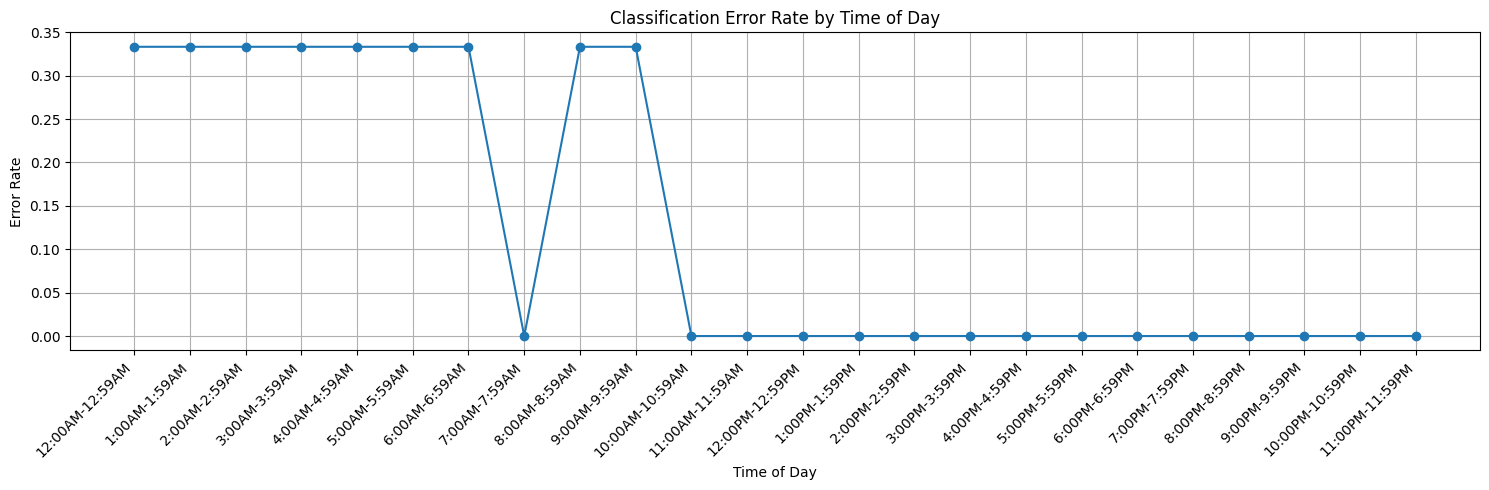

0 0
100 2
500 7
1000 0
INFINITE 0


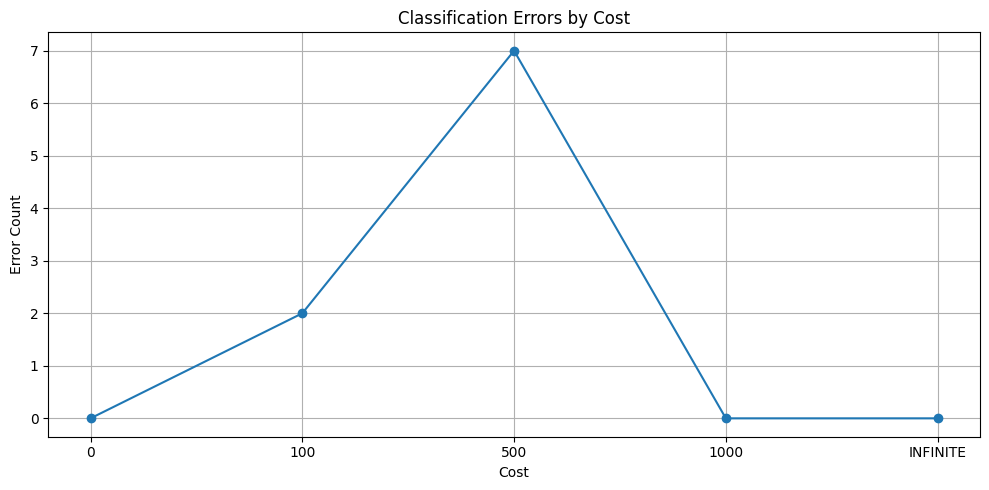

In [ ]:
#prompts = [prompt, prompt2, prompt3]
results = [result, result2, result3]
targets = [target, target2, target3]
hours = ["12:00AM-12:59AM", "1:00AM-1:59AM", "2:00AM-2:59AM", "3:00AM-3:59AM", "4:00AM-4:59AM", "5:00AM-5:59AM", "6:00AM-6:59AM", "7:00AM-7:59AM", "8:00AM-8:59AM", "9:00AM-9:59AM", "10:00AM-10:59AM", "11:00AM-11:59AM", "12:00PM-12:59PM", "1:00PM-1:59PM", "2:00PM-2:59PM", "3:00PM-3:59PM", "4:00PM-4:59PM", "5:00PM-5:59PM", "6:00PM-6:59PM", "7:00PM-7:59PM", "8:00PM-8:59PM", "9:00PM-9:59PM", "10:00PM-10:59PM", "11:00PM-11:59PM"]
costs = ["0", "100", "500", "1000", "INFINITE"]

# Create lists for plotting
error_rates = [analyze_error_by_time_of_day(hour, results, targets) for hour in hours]
plt.figure(figsize=(15,5))
plt.plot(range(len(hours)), error_rates, marker='o')
plt.xticks(range(len(hours)), hours, rotation=45, ha='right')
plt.xlabel('Time of Day')
plt.ylabel('Error Rate')
plt.title('Classification Error Rate by Time of Day')
plt.grid(True)
plt.tight_layout()
plt.show()

for cost in costs:
    print(cost, analyze_error_by_cost(cost, results, targets))

# Create lists for plotting
error_rates_by_cost = [analyze_error_by_cost(cost, results, targets) for cost in costs]
plt.figure(figsize=(10,5))
plt.plot(range(len(costs)), error_rates_by_cost, marker='o')
plt.xticks(range(len(costs)), costs)
plt.xlabel('Cost')
plt.ylabel('Error Count') 
plt.title('Classification Errors by Cost')
plt.grid(True)
plt.tight_layout()
plt.show()





In [ ]:
def gen_context(prompt, time):
    return f"""

        Task Description:
        Generate a cost for the specified hour that aligns with natural language constraints and preferences for scheduling activities.

        For context:
        - Certain times are completely unavailable (e.g., sleep, existing meetings) which have INF cost.
        - Some times are less ideal (e.g., early morning or late evening) which have a cost of 100, 500, or 1000.
        - Certain times are optimal for scheduling activities which have a cost of 0.

        Examples:

        Description:  From 12:00 AM to 6:59 AM, scheduling is unreasonable due to a preference against early appointments, so this time has a very high cost of 1000. From 7:00 AM to 8:59 AM, the time is available but less ideal, warranting a moderate cost of 50. From 9:00 AM to 2:00 PM, work constraints render these times unavailable with an INFINITE cost. Between 2:00 PM and 2:59 PM, this period is flexible and ideal for the doctor's appointment, so it has a cost of 0. From 3:00 PM to 3:59 PM, the dentist appointment makes this hour unavailable with an INFINITE cost. From 4:00 PM to 9:00 PM, scheduling is optimal, also with a cost of 0. Finally, from 9:01 PM to 11:59 PM, late hours are less preferable and have a high cost of 500.  
        Specified Hour: 12:00AM-12:59AM
        Output: 1000 

        Description:  From 12:00 AM to 6:59 AM, scheduling is unreasonable due to a preference against early appointments, so this time has a very high cost of 1000. From 7:00 AM to 8:59 AM, the time is available but less ideal, warranting a moderate cost of 50. From 9:00 AM to 2:00 PM, work constraints render these times unavailable with an INFINITE cost. Between 2:00 PM and 2:59 PM, this period is flexible and ideal for the doctor's appointment, so it has a cost of 0. From 3:00 PM to 3:59 PM, the dentist appointment makes this hour unavailable with an INFINITE cost. From 4:00 PM to 9:00 PM, scheduling is optimal, also with a cost of 0. Finally, from 9:01 PM to 11:59 PM, late hours are less preferable and have a high cost of 500.  
        Specified Hour: 9:00AM-9:59AM
        Output: INF 

        Description: From 12:00 AM to 6:59 AM, scheduling is unreasonable due to a preference against early appointments, so this time has a very high cost of 1000. From 7:00 AM to 8:59 AM, the time is available but less ideal, warranting a moderate cost of 50. From 9:00 AM to 2:00 PM, work constraints render these times unavailable with an INFINITE cost. Between 2:00 PM and 2:59 PM, this period is flexible and ideal for the doctor's appointment, so it has a cost of 0. From 3:00 PM to 3:59 PM, the dentist appointment makes this hour unavailable with an INFINITE cost. From 4:00 PM to 9:00 PM, scheduling is optimal, also with a cost of 0. Finally, from 9:01 PM to 11:59 PM, late hours are less preferable and have a high cost of 500.
        Specified Hour: 2:00PM-2:59PM  
        Output: 0

        Description: From 12:00 AM to 5:00 AM, scheduling soccer practice is unreasonable as it falls outside daylight hours, resulting in a high cost of 500. Between 5:01 AM and 7:00 AM, the early sunrise makes it less ideal, leading to a moderate cost of 100. From 7:01 AM to 4:00 PM, this time is available but not optimal, warranting a low-moderate cost of 50. The period from 4:00 PM to 5:59 PM is ideal for soccer practice, so the cost is 0. From 6:00 PM to 6:59 PM, the yoga class creates a scheduling conflict with an INFINITE cost. Finally, from 7:00 PM to 11:59 PM, scheduling falls outside preferred daylight hours, with a cost ranging linearly from 50 to 100.  
        Specified Hour: 4:00AM-4:59AM  
        Output: 500

        Description: From 12:00 AM to 5:00 AM, scheduling soccer practice is unreasonable as it falls outside daylight hours, resulting in a high cost of 500. Between 5:01 AM and 7:00 AM, the early sunrise makes it less ideal, leading to a moderate cost of 100. From 7:01 AM to 4:00 PM, this time is available but not optimal, warranting a low-moderate cost of 50. The period from 4:00 PM to 5:59 PM is ideal for soccer practice, so the cost is 0. From 6:00 PM to 6:59 PM, the yoga class creates a scheduling conflict with an INFINITE cost. Finally, from 7:00 PM to 11:59 PM, scheduling falls outside preferred daylight hours, with a cost ranging linearly from 50 to 100.  
        Specified Hour: 7:00AM-7:59AM 
        Output: 100  

        
        Given the following description, determine the exact cost for the specified hour:

        Description: {prompt}  
        Specified Hour: {time}

        Hard Constraints:
        1. Only select a cost from 0, 100, 500, 1000, INF.
        2. Always evaluate and assign a cost based on the specific hour, without inferring across multiple hours.
        3. The output should be a single choice from 0, 100, 500, 1000, INF.
        4. If the described cost is not one of the options, return the cost that is closest to the described cost. For example, if the described cost is 50, return 100 as 50 is not an option and 100 is the closest option to 50.
        5. Do not make up information that is not provided in the description and follow the constraints exactly.

        Output: 
        """

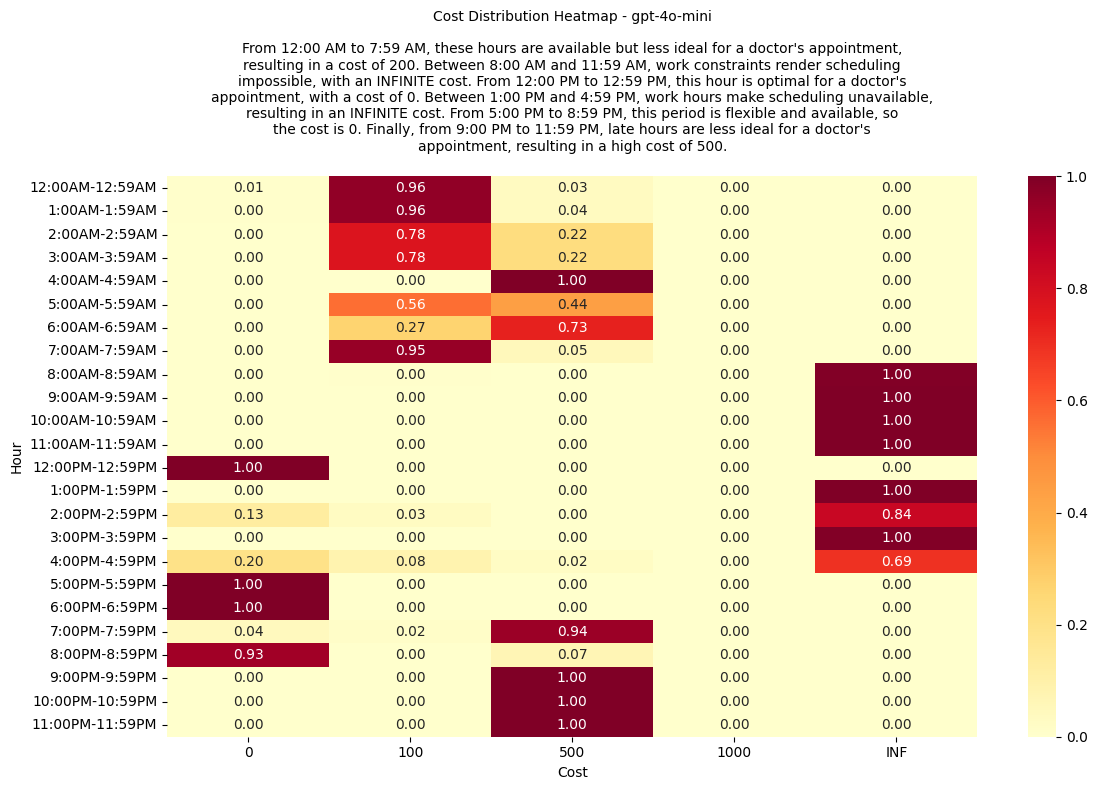

In [ ]:
from openai import OpenAI
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import textwrap
import os


prompts = [prompt, prompt2, prompt3]
hours = ["12:00AM-12:59AM", "1:00AM-1:59AM", "2:00AM-2:59AM", "3:00AM-3:59AM", "4:00AM-4:59AM", "5:00AM-5:59AM", "6:00AM-6:59AM", "7:00AM-7:59AM", "8:00AM-8:59AM", "9:00AM-9:59AM", "10:00AM-10:59AM", "11:00AM-11:59AM", "12:00PM-12:59PM", "1:00PM-1:59PM", "2:00PM-2:59PM", "3:00PM-3:59PM", "4:00PM-4:59PM", "5:00PM-5:59PM", "6:00PM-6:59PM", "7:00PM-7:59PM", "8:00PM-8:59PM", "9:00PM-9:59PM", "10:00PM-10:59PM", "11:00PM-11:59PM"]
costs = ["0", "100", "500", "1000", "INF"]


os.environ["OPENAI_API_KEY"] = ''
# Initialize OpenAI client
client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])

def get_cost_distribution_for_hour(prompt, hour, model_name):
    """Get distribution of costs for a specific hour using logprobs"""

    messages = [
        {"role": "system", "content": """You are a cost assessment system.
        You MUST respond with EXACTLY ONE of these values: 0, 100, 500, 1000, INF
        Do not include quotes or any other text."""},
        {"role": "user", "content": gen_context(prompt, hour)}
    ]
   
    try:
        response = client.chat.completions.create(
            model=model_name,
            messages=messages,
            temperature=0.0,
            logprobs=True,
            top_logprobs=10
        )
        
        # Extract logprobs from TopLogprob objects
        logprobs_dict = {
            item.token.strip('"').strip(): item.logprob 
            for item in response.choices[0].logprobs.content[0].top_logprobs
            if item.token.strip('"').strip() in ["0", "100", "500", "1000", "INF"]
        }
        
        # Convert logprobs to probabilities
        probs = {token: math.exp(logprob) for token, logprob in logprobs_dict.items()}
        
        # Normalize probabilities
        total = sum(probs.values())
        if total > 0:  # Only normalize if we have valid probabilities
            distribution = {
                cost: probs.get(cost, 0)/total 
                for cost in ["0", "100", "500", "1000", "INF"]
            }
        else:
            distribution = {cost: 0 for cost in ["0", "100", "500", "1000", "INF"]}
        
        # print(f"Hour: {hour}")
        # print(f"Logprobs dict: {logprobs_dict}")
        # print(f"Probs: {probs}")
        # print(f"Distribution: {distribution}\n")
        
        return distribution
    except Exception as e:
        print(f"Error getting distribution for {hour}: {e}")
        return None

def plot_cost_distribution(prompt, prompt_number, model_name):
    # Get distribution for each hour
    distributions = {}
    for hour in hours:  # Limited to first 3 hours for example
        dist = get_cost_distribution_for_hour(prompt, hour, model_name)
        if dist:
            distributions[hour] = dist
    
    # Create heatmap data
    df = pd.DataFrame(distributions).T
    
    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df, annot=True, fmt='.2f', cmap='YlOrRd', vmin=0, vmax=1)
    wrapped_prompt = '\n'.join(textwrap.wrap(prompt, width=100))
    plt.title(f'Cost Distribution Heatmap - {model_name}\n\n{wrapped_prompt}', 
                    fontsize=10, 
                    pad=20,
                    wrap=True)
    plt.xlabel('Cost')
    plt.ylabel('Hour')
    plt.tight_layout()
    plt.savefig(f'cost_distribution_heatmap_{model_name}_{prompt_number}.png')
    plt.show()

# Test with first prompt
plot_cost_distribution(prompt1, 1, "gpt-4o-mini")

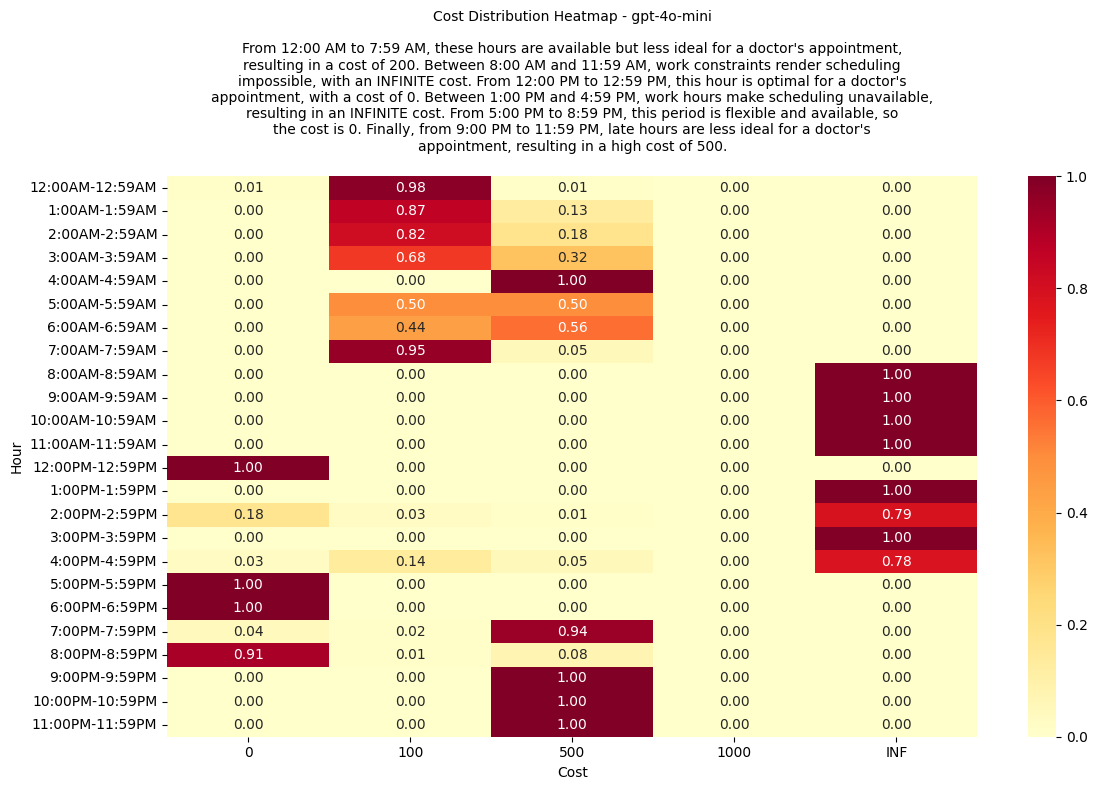

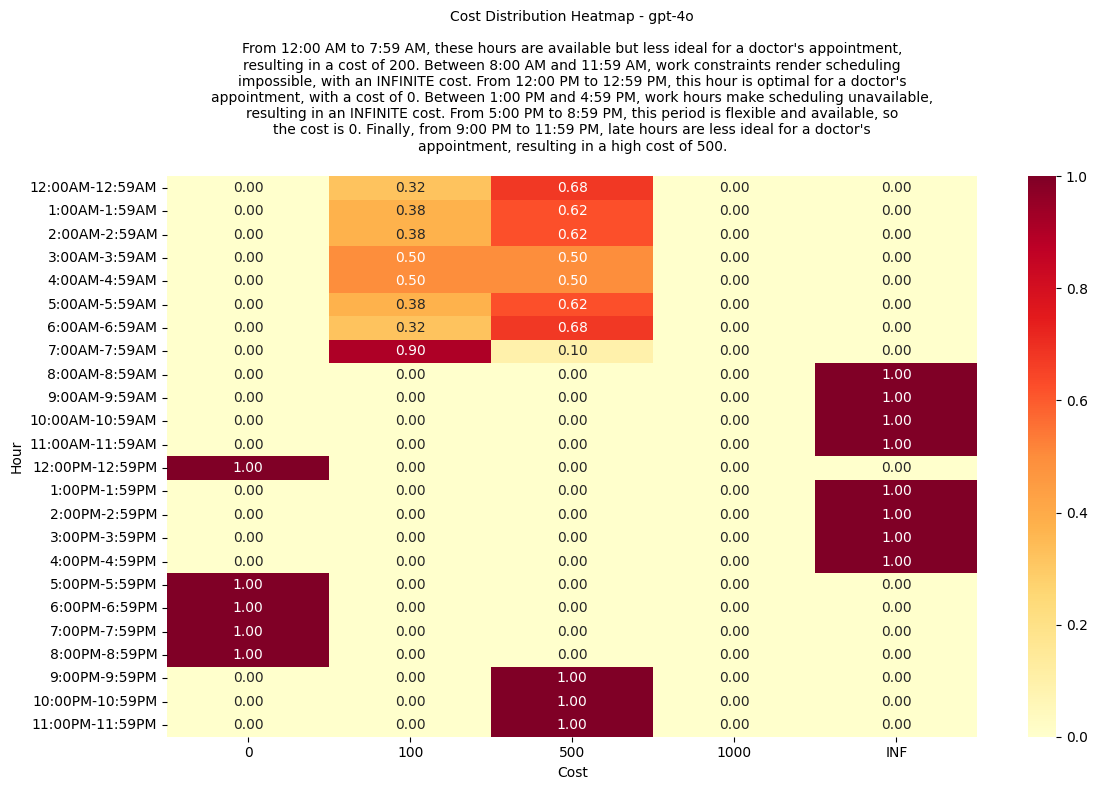

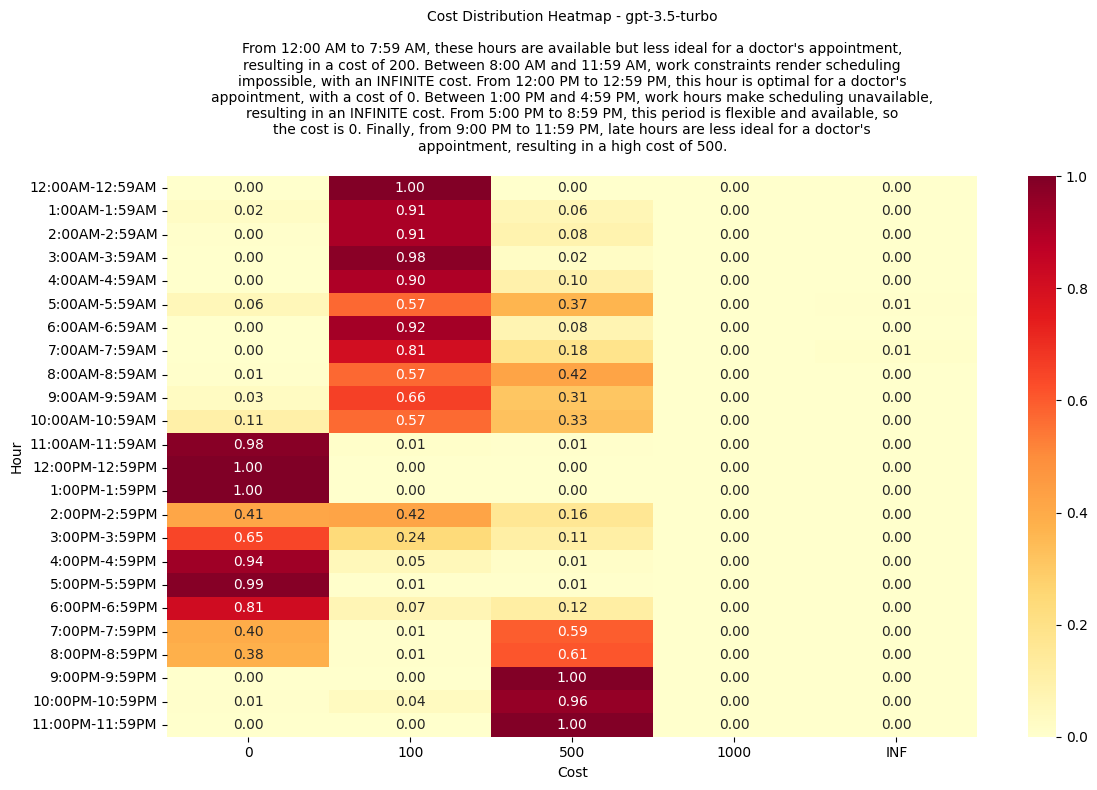

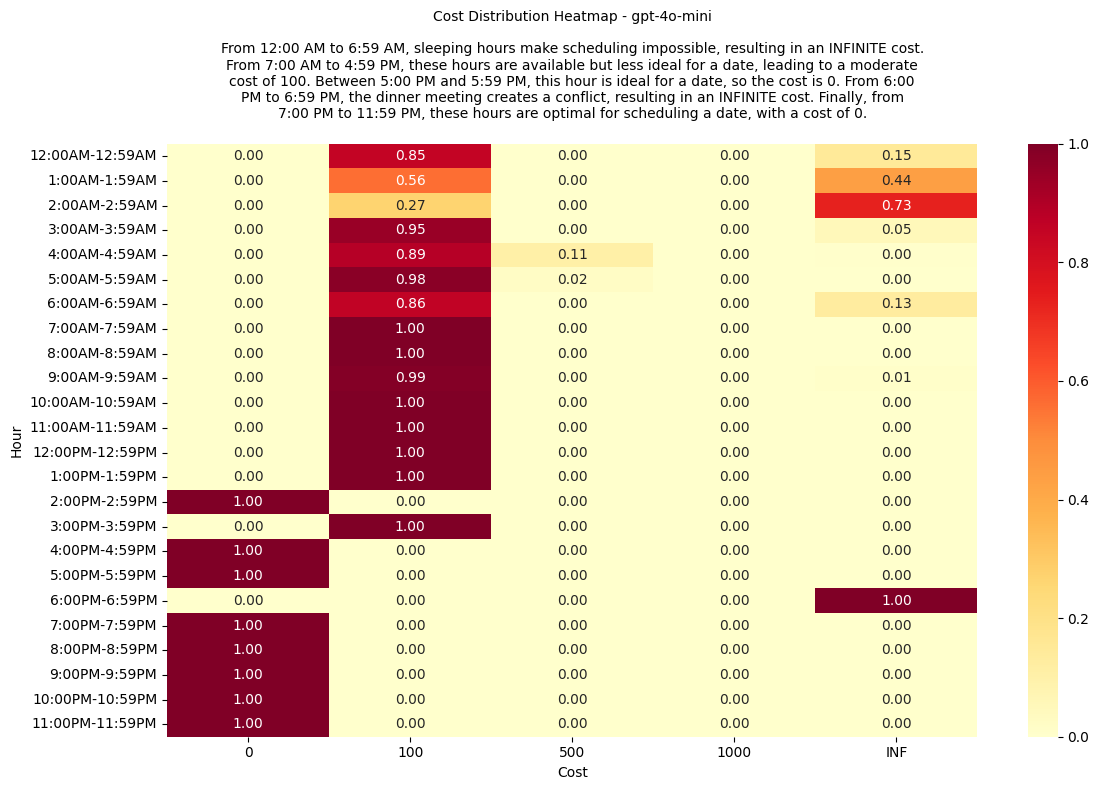

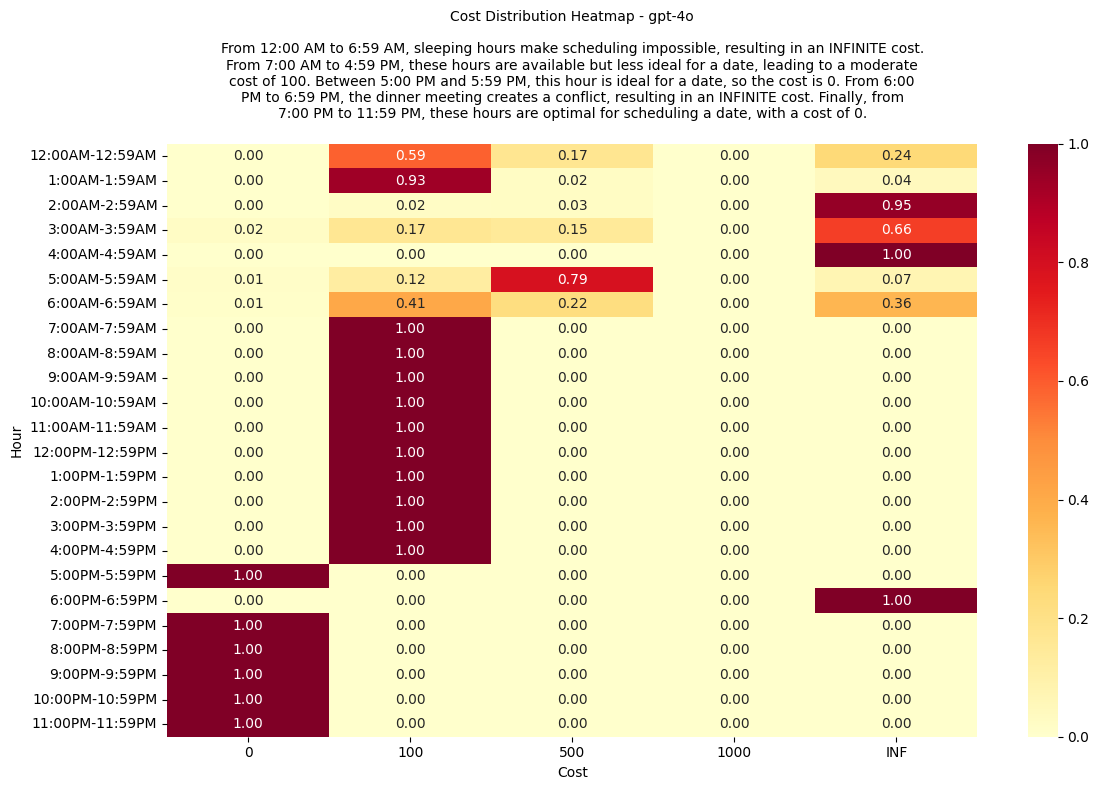

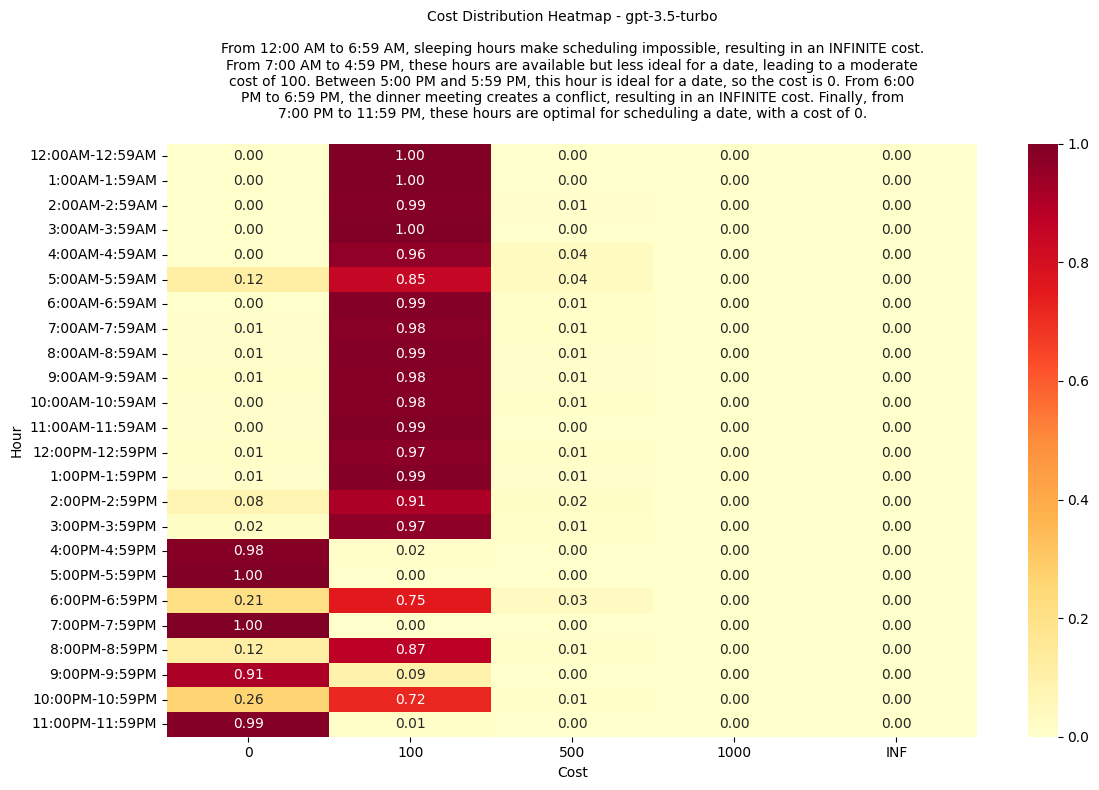

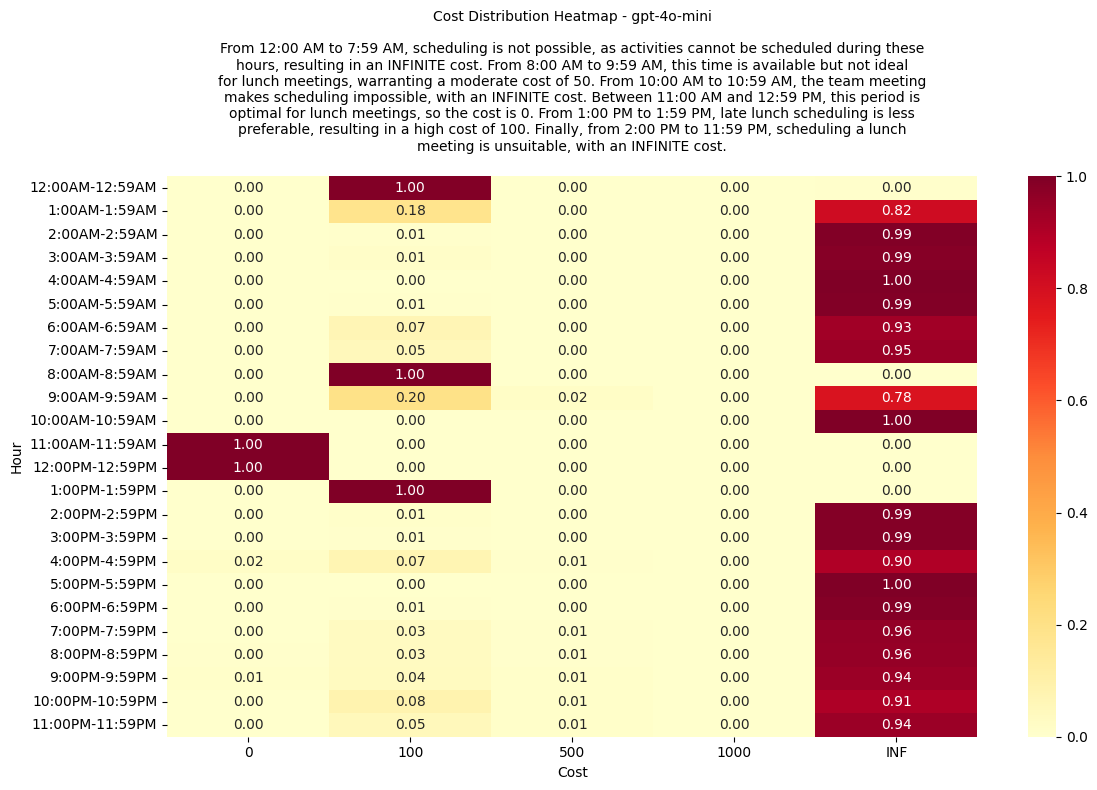

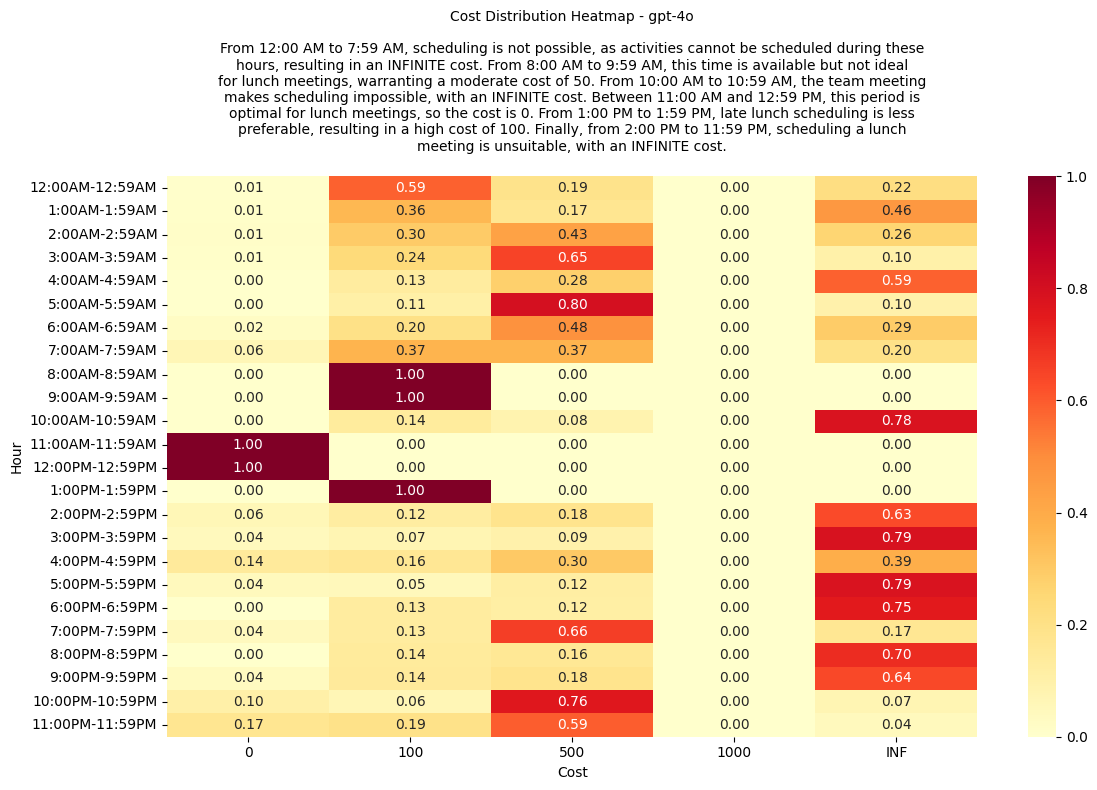

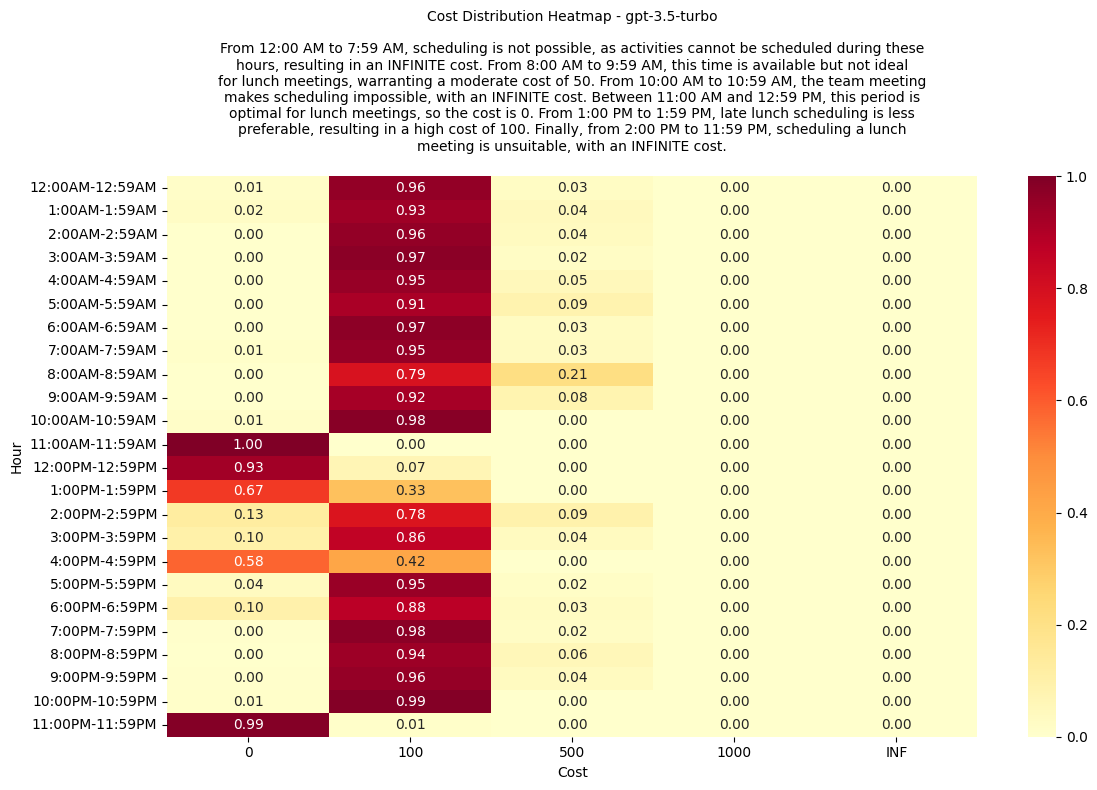

In [41]:
prompts = [prompt1, prompt2, prompt3]
for i, p in enumerate(prompts):
    for model_name in ["gpt-4o-mini", "gpt-4o", "gpt-3.5-turbo"]:
        plot_cost_distribution(p, i+1, model_name)